# Introduction

In Chapter 3 we devised a signature v2 algorithm.

In this chapter we implement it and use it.

In [1]:
def check(message, condition: bool):
    if condition:
        print(f"✅ {message}")
    else:
        print(f"❌ {message}")


# 1 Check NodeSignature

## 1.1 Check Comparer Inequality

Verifies compare_signatures correctly orders distinct signatures based on all priority rules.

In [2]:
from graph_signature_v2 import NodeSignature, compare_signatures, make_fig

check(
    """1.1.1 {neighbourCount:4} is shown before {neighbourCount:3}""",
    compare_signatures(
        NodeSignature(label="A", neighbourCount=4),
        NodeSignature(label="B", neighbourCount=3),
    )
    < 0,
)

check(
    """1.1.2 {finalIndex:3} is shown before {finalIndex:4}""",
    compare_signatures(
        NodeSignature(label="A", finalIndex=3, neighbourCount=1),
        NodeSignature(label="B", finalIndex=4, neighbourCount=1),
    )
    < 0,
)

check(
    """1.1.3 {cycleDistance:3} is shown before {cycleDistance:4}""",
    compare_signatures(
        NodeSignature(label="A", cycleDistance=3, neighbourCount=1),
        NodeSignature(label="B", cycleDistance=4, neighbourCount=1),
    )
    < 0,
)

check(
    """1.1.4 {resolutionStep:1} is shown before {resolutionStep:2}""",
    compare_signatures(
        NodeSignature(label="A", finalIndex=0, neighbourCount=1, resolutionStep=1),
        NodeSignature(label="B", finalIndex=0, neighbourCount=1, resolutionStep=2),
    )
    < 0,
)

check(
    """1.1.5 {inner neighbourCount:2} is shown before {inner neighbourCount:1}""",
    compare_signatures(
        NodeSignature(
            label="A",
            neighbourCount=1,
            neighbours=[NodeSignature(neighbourCount=2, label="?")],
        ),
        NodeSignature(
            label="B",
            neighbourCount=1,
            neighbours=[NodeSignature(neighbourCount=1, label="?")],
        ),
    )
    < 0,
)

✅ 1.1.1 {neighbourCount:4} is shown before {neighbourCount:3}
✅ 1.1.2 {finalIndex:3} is shown before {finalIndex:4}
✅ 1.1.3 {cycleDistance:3} is shown before {cycleDistance:4}
✅ 1.1.4 {resolutionStep:1} is shown before {resolutionStep:2}
✅ 1.1.5 {inner neighbourCount:2} is shown before {inner neighbourCount:1}


## 1.2 Check NodeSignature Comparer Equality

Verifies compare_signatures returns zero for signatures considered identical by all priority rules.

In [3]:
check(
    """1.2.1 {neighbourCount:4} is equal to {neighbourCount:4}""",
    compare_signatures(
        NodeSignature(label="A", neighbourCount=4),
        NodeSignature(label="B", neighbourCount=4),
    )
    == 0,
)

check(
    """1.2.2 {finalIndex:3} is equal to {finalIndex:3}""",
    compare_signatures(
        NodeSignature(label="A", finalIndex=3, neighbourCount=1),
        NodeSignature(label="B", finalIndex=3, neighbourCount=1),
    )
    == 0,
)

check(
    """1.2.3 {cycleDistance:3} is equal to {cycleDistance:3}""",
    compare_signatures(
        NodeSignature(label="A", cycleDistance=3, neighbourCount=1),
        NodeSignature(label="B", cycleDistance=3, neighbourCount=1),
    )
    == 0,
)

check(
    """1.2.4 {resolutionStep:1} is equal to {resolutionStep:1}""",
    compare_signatures(
        NodeSignature(label="A", finalIndex=0, neighbourCount=1, resolutionStep=1),
        NodeSignature(label="B", finalIndex=0, neighbourCount=1, resolutionStep=1),
    )
    == 0,
)

check(
    """1.2.5 {inner neighbourCount:2} is equal to {inner neighbourCount:2}""",
    compare_signatures(
        NodeSignature(
            label="A",
            neighbourCount=1,
            neighbours=[NodeSignature(neighbourCount=2, label="?")],
        ),
        NodeSignature(
            label="B",
            neighbourCount=1,
            neighbours=[NodeSignature(neighbourCount=2, label="?")],
        ),
    )
    == 0,
)

✅ 1.2.1 {neighbourCount:4} is equal to {neighbourCount:4}
✅ 1.2.2 {finalIndex:3} is equal to {finalIndex:3}
✅ 1.2.3 {cycleDistance:3} is equal to {cycleDistance:3}
✅ 1.2.4 {resolutionStep:1} is equal to {resolutionStep:1}
✅ 1.2.5 {inner neighbourCount:2} is equal to {inner neighbourCount:2}


## 1.3 Check Complex Priority Fallback

In [4]:
check(
    "1.3.1 Falls back to resolutionStep when neighbourCount is equal",
    compare_signatures(
        NodeSignature(label="A", neighbourCount=3, resolutionStep=2),
        NodeSignature(label="B", neighbourCount=3, resolutionStep=5),
    )
    < 0,  # Should be true because 2 < 5
)

check(
    "1.3.2 Falls back to cycleDistance when neighbourCount and resolutionStep are equal",
    compare_signatures(
        NodeSignature(label="A", neighbourCount=3, resolutionStep=2, cycleDistance=2),
        NodeSignature(label="B", neighbourCount=3, resolutionStep=2, cycleDistance=5),
    )
    < 0,  # Should be true because 2 < 5
)


check(
    "1.3.3 Falls back to finalIndex when neighbourCount,resolutionStep and cycleDistance are equal",
    compare_signatures(
        NodeSignature(
            label="A", neighbourCount=3, resolutionStep=2, cycleDistance=2, finalIndex=2
        ),
        NodeSignature(
            label="B", neighbourCount=3, resolutionStep=2, cycleDistance=2, finalIndex=5
        ),
    )
    < 0,  # Should be true because 2 < 5
)

# Let's build two complex but identical signatures for a deep equality check.
sig_a = NodeSignature(
    label="A",
    neighbourCount=2,
    resolutionStep=3,
    cycleDistance=None,  # Explicitly same
    finalIndex=5,
    neighbours=[
        NodeSignature(neighbourCount=4, label="?"),
        NodeSignature(neighbourCount=3, label="?", finalIndex=10),
    ],
)

sig_b = NodeSignature(
    label="B",
    neighbourCount=2,  # Identical
    resolutionStep=3,  # Identical
    cycleDistance=None,  # Identical
    finalIndex=5,  # Identical
    neighbours=[
        NodeSignature(neighbourCount=4, label="?"),  # Identical inner signature 1
        NodeSignature(
            neighbourCount=3, label="?", finalIndex=10
        ),  # Identical inner signature 2
    ],
)

check(
    "1.3.4 Returns 0 for deeply identical complex signatures",
    compare_signatures(sig_a, sig_b) == 0,
)

sig_c = NodeSignature(
    label="B",
    neighbourCount=2,  # Identical
    resolutionStep=3,  # Identical
    cycleDistance=None,  # Identical
    finalIndex=5,  # Identical
    neighbours=[
        NodeSignature(neighbourCount=4, label="?"),  # Identical
        NodeSignature(neighbourCount=3, label="?", finalIndex=11),  # Different
    ],
)

check(
    "1.3.5 Compares deep signatures",
    compare_signatures(sig_a, sig_c) < 0,  # inner finalIndex 10 < inner finalIndex 11
)

✅ 1.3.1 Falls back to resolutionStep when neighbourCount is equal
✅ 1.3.2 Falls back to cycleDistance when neighbourCount and resolutionStep are equal
✅ 1.3.3 Falls back to finalIndex when neighbourCount,resolutionStep and cycleDistance are equal
✅ 1.3.4 Returns 0 for deeply identical complex signatures
✅ 1.3.5 Compares deep signatures


# 2 Check GraphSignatures

## 2.1 check GraphSignatures constructor with a complex Graph

Verifies that the constructor correctly initializes the signatures map from a more complex graph that will be reused in subsequent tests.

In [5]:
import networkx as nx
from graph_signature_v2 import GraphSignatures, compare_signatures

# 1. Create the complex graph for our tests
complex_graph = nx.Graph()
edges = [
    ("A", "B"), ("A", "C"), ("A", "D"),
    ("B", "D"), ("B", "E"), ("B", "F"),
    ("E", "F") 
]
complex_graph.add_edges_from(edges)

# 2. Instantiate the GraphSignatures object
g_sigs_complex = GraphSignatures(graph=complex_graph)

# 3. Perform checks
print("--- 2.1 Check GraphSignatures constructor with complex graph ---")

check(
    "2.1.1 The number of signatures should match the number of nodes (6)",
    len(g_sigs_complex.signatures_map) == 6
)

# Check a unique node 'B' (degree 4)
node_b_sig = g_sigs_complex.signatures_map.get("B")
check(
    "2.1.2 Node 'B' signature is correctly initialized with neighbourCount=4",
    node_b_sig is not None and node_b_sig.neighbourCount == 4
)

# Check an ambiguous node 'D' (degree 2)
node_d_sig = g_sigs_complex.signatures_map.get("D")
check(
    "2.1.3 Node 'D' signature is correctly initialized with neighbourCount=2",
    node_d_sig is not None and node_d_sig.neighbourCount == 2
)

# Crucial check: verify that the initially ambiguous nodes have equal signatures
node_e_sig = g_sigs_complex.signatures_map.get("E")
node_f_sig = g_sigs_complex.signatures_map.get("F")
check(
    "2.1.4 Initially, signatures of structurally ambiguous nodes ('D', 'E', 'F') are equal",
    compare_signatures(node_d_sig, node_e_sig) == 0 and
    compare_signatures(node_d_sig, node_f_sig) == 0
)

--- 2.1 Check GraphSignatures constructor with complex graph ---
✅ 2.1.1 The number of signatures should match the number of nodes (6)
✅ 2.1.2 Node 'B' signature is correctly initialized with neighbourCount=4
✅ 2.1.3 Node 'D' signature is correctly initialized with neighbourCount=2
✅ 2.1.4 Initially, signatures of structurally ambiguous nodes ('D', 'E', 'F') are equal


## 2.2 Check the first `process_pass` on the complex graph


Verifies that `process_pass` correctly finalizes all nodes that are unique
by their degree in the first pass, while leaving ambiguous nodes unresolved.

| Node | Neighbour count | Neighbours |
| :--- | :-------------- | :--------- |
| A    | 3               | B C D      |
| B    | 4               | A D E F    |
| C    | 1               | A          |
| D    | 2               | A B        |
| E    | 2               | B F        |
| F    | 2               | B E        |

![ch4-graph1.png](images/ch4-graph1.png)


### 2.2.1 Pass 1

--- 2.2 Check first process_pass on complex graph ---
✅ 2.2.1 process_pass should report that progress was made
✅ 2.2.2 Node 'B' (nc=4) should be finalized
✅ 2.2.3 Node 'A' (nc=3) should be finalized
✅ 2.2.4 Node 'C' (nc=1) should be finalized
✅ 2.2.5 Node 'D' (nc=2) should NOT be finalized
✅ 2.2.6 Node 'E' (nc=2) should NOT be finalized
✅ 2.2.7 Node 'F' (nc=2) should NOT be finalized
✅ 2.2.8 Node 'B' has correct finalIndex
✅ 2.2.9 Node 'A' has correct finalIndex
✅ 2.2.10 Node 'C' has correct finalIndex


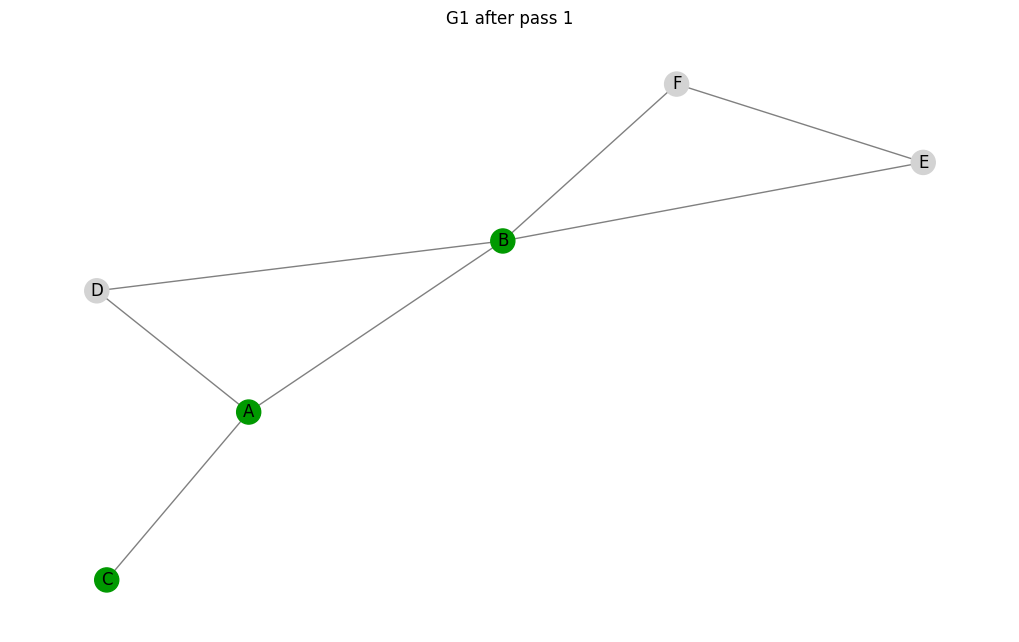

In [6]:
# Re-creating the setup to keep the test cell independent

g_sigs_2_2 = GraphSignatures(graph=complex_graph)

# Run the first pass
made_progress = g_sigs_2_2.process_pass(pass_number=1)

# --- Perform checks ---
print("--- 2.2 Check first process_pass on complex graph ---")

check(
    "2.2.1 process_pass should report that progress was made",
    made_progress == True
)

# Get all signatures after the pass
sigs = g_sigs_2_2.signatures_map
node_a_sig = sigs.get("A")
node_b_sig = sigs.get("B")
node_c_sig = sigs.get("C")
node_d_sig = sigs.get("D")
node_e_sig = sigs.get("E")
node_f_sig = sigs.get("F")

# Check the unique nodes that should now be finalized
check("2.2.2 Node 'B' (nc=4) should be finalized", node_b_sig.isFinalized())
check("2.2.3 Node 'A' (nc=3) should be finalized", node_a_sig.isFinalized())
check("2.2.4 Node 'C' (nc=1) should be finalized", node_c_sig.isFinalized())

# Check the ambiguous group that should NOT be finalized
check("2.2.5 Node 'D' (nc=2) should NOT be finalized", not node_d_sig.isFinalized())
check("2.2.6 Node 'E' (nc=2) should NOT be finalized", not node_e_sig.isFinalized())
check("2.2.7 Node 'F' (nc=2) should NOT be finalized", not node_f_sig.isFinalized())

# Optional: Check the finalIndex values based on descending neighbourCount sort
# B (nc=4) -> index 0
# A (nc=3) -> index 1
# D,E,F (nc=2) -> indices 2,3,4
# C (nc=1) -> index 5
check("2.2.8 Node 'B' has correct finalIndex", node_b_sig.finalIndex == 0)
check("2.2.9 Node 'A' has correct finalIndex", node_a_sig.finalIndex == 1)
check("2.2.10 Node 'C' has correct finalIndex", node_c_sig.finalIndex == 5)

make_fig(g_sigs_2_2, "G1 after pass 1")

### 2.2.2 Pass 2

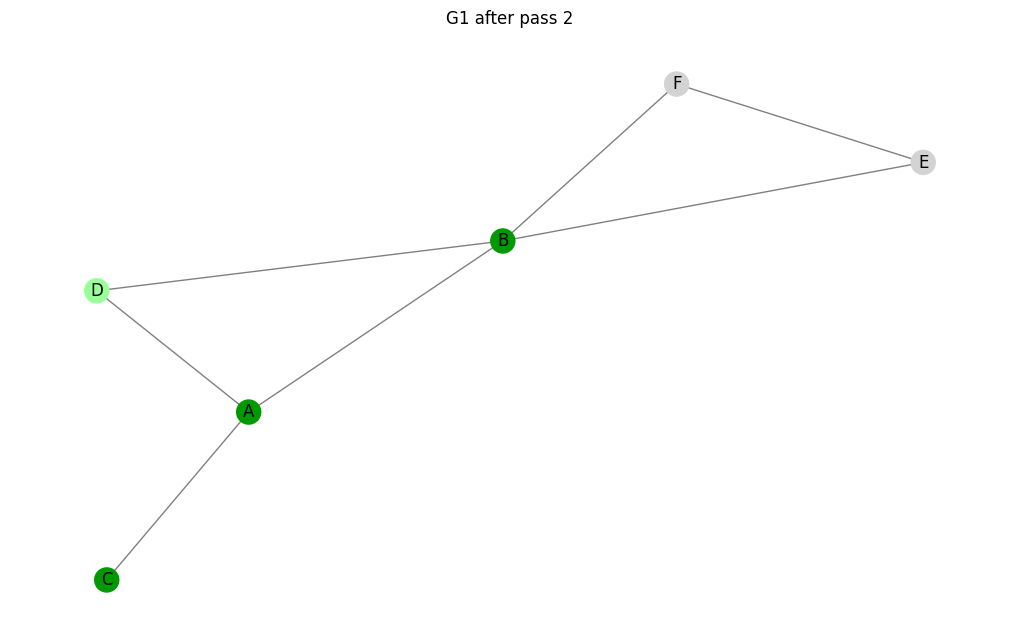

In [7]:
g_sigs_2_2.expand_ambiguous_nodes(pass_number=2)
made_progress = g_sigs_2_2.process_pass(pass_number=2)

make_fig(g_sigs_2_2, "G1 after pass 2")

### 2.2.3 Pass 3

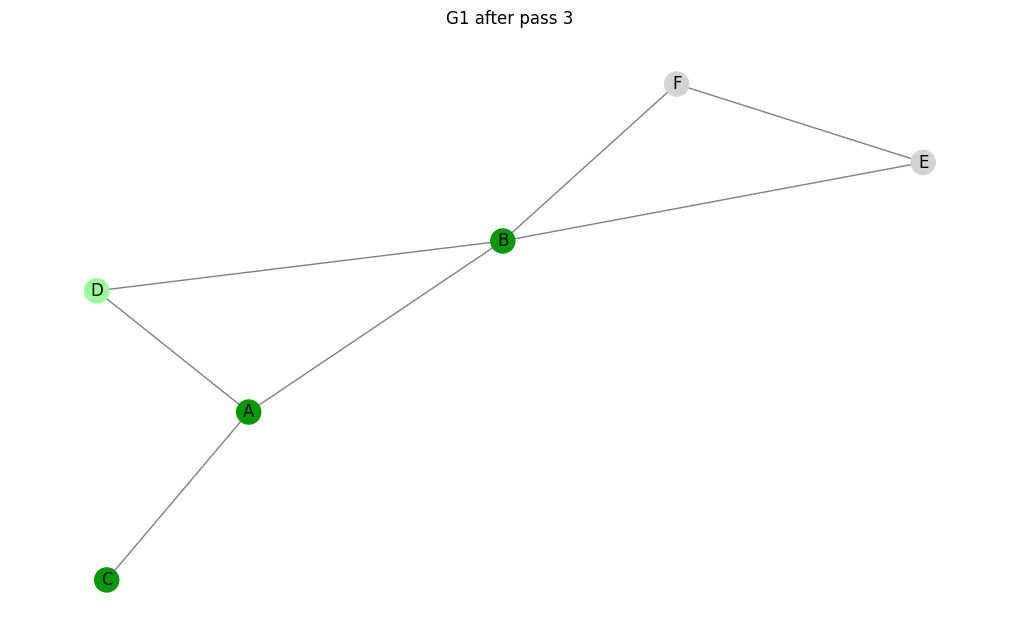

In [8]:
g_sigs_2_2.expand_ambiguous_nodes(pass_number=3)
made_progress = g_sigs_2_2.process_pass(pass_number=3)

make_fig(g_sigs_2_2, "G1 after pass 3")